# Tema 1 #

In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
def modelo_malthus(x0, r, n):
  """
  Implementa el modelo de crecimiento económico.

  Argumentos:
    x0 (int): Población inicial.
    r (float): Tasa de crecimiento anual.
    n (int): Número de iteraciones.

  Retorna:
    list: Lista con la población en cada iteración.
  """
  poblacion = []
  for i in range(n + 1):
    poblacion.append(x0 * (r) ** i)
  return poblacion

def graficar_modelo_malthus(x0, r, n):
  """
  Calcula y grafica el modelo Economico.

  Argumentos:
    x0 (int): Población inicial.
    r (float): Tasa de crecimiento anual.
    n (int): Número de iteraciones.
  """
  poblacion = modelo_malthus(x0, r, n)

  plt.figure(figsize=(10, 6))
  plt.plot(range(n + 1), poblacion, 'o-')
  plt.xlabel("Iteración")
  plt.ylabel("Población")
  plt.title(f"Crecimiento Economico (x0={x0}, r={r}, n={n})")
  plt.show()



In [114]:
def graficar(rango, secuencia, label, x_label, y_label, title):
    plt.plot(rango, secuencia, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def graficar_vectores(rango, y1, y2, label1, label2, xlabel, ylabel, title):
    plt.plot(rango, y1, label=label1)
    plt.plot(rango, y2, label=label2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def find_equilibrium(demand_func, supply_func):
    p = 0
    while True:
        demand = demand_func(p)
        supply = supply_func(p)
        if abs(demand - supply) < 0.01:  # Umbral de tolerancia
            return p
        p += 0.01  # Incremento en el precio para la siguiente iteración

def cobWeb(a, b, c, d, p_initial, num_periods, plot=False):
    prices = [p_initial]
    equilibrium_price = (a - c) / (d + b)
    supply_f = lambda p: c + d * p
    demand_f = lambda p: a - b * p

    for i in range(num_periods):
        p_current = prices[-1]
        p_next = equilibrium_price + (p_initial - equilibrium_price) * (-1)**i * (d / b)**i
        prices.append(p_next)

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(prices, 'o-', label='Precio por Periodo')
        plt.axhline(y=equilibrium_price, color='r', linestyle='--', label='Precio de Equilibrio')
        plt.xlabel('Periodo')
        plt.ylabel('Precio')
        plt.title('Evolución del Precio en el Modelo de la Telaraña')
        plt.legend()
        plt.show()

    return prices

def graph_supply_demand(demand_f, supply_f, prices):
    max_price = max(prices)
    min_price = min(prices)
    price_range = np.arange(min_price - 0.1, max_price + 0.1, 0.1)

    supply_array = [supply_f(p) for p in price_range]
    demand_array = [demand_f(p) for p in price_range]

    plt.plot(price_range,supply_array,  label='Oferta', color='green')
    plt.plot(price_range,demand_array,  label='Demanda', color='red')


def graph_cobWeb(prices, demand_func, supply_func):
    
    plt.figure(figsize=(10, 5))
    plt.ylabel('Cantidad')
    plt.xlabel('Precio')
    
    points_arr = []
    for i in range(len(prices) - 1):
        p0 = prices[i]
        p1 = prices[i + 1]
        q0 = supply_func(p0)
        q1 = demand_func(p0)

        points_arr.append((p0, q0))
        points_arr.append((p1, q0))
        points_arr.append((p1, q1))
    # Separa las coordenadas x de las coordenadas y
    x, y = zip(*points_arr)
    #Graficalas junto con las funciones supply u demmand

    graph_supply_demand(demand_func, supply_func, prices)
    plt.plot(x, y, label='Telaraña', color='blue', linestyle='--')
    plt.legend()
    plt.show()


    

In [78]:
import matplotlib.pyplot as plt
import numpy as np

def modelo_logistico(a, b, x0, n):
    if(a == 0):
        return (x0 + n*b)
    else:
        return ((x0 - b/(1-a))*a**n + b/(1-a))
    

## Ejercicio 1 (Depósito Capital) ## 


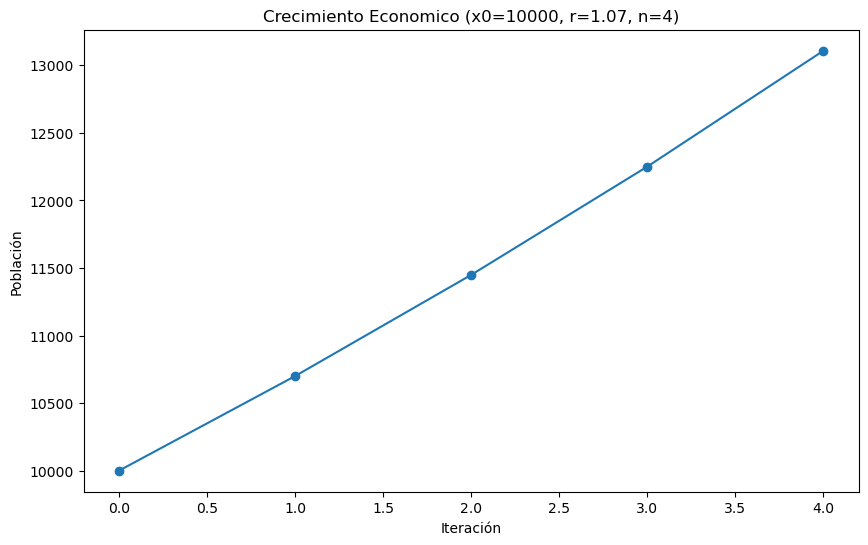

[10000.0, 10700.0, 11449.0, 12250.43, 13107.960100000002]


In [79]:
# Ejemplo de uso en modelo económico

x0 = 10000
r = 1.07 # Interes
n = 4

graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))

# Se tiene un capital inicial de 10000 euros y dado un interes del 7% anual, 
# se espera que el capital crezca exponencialmente en 4 años. En el ejercicio teníamos
# un capital de 13107,96 euros a los 4 años y en la gráfica podemos ver que es correcto
# dicho cálculo.


## Ejercicio 2 (Explosión Demográfica) ## 

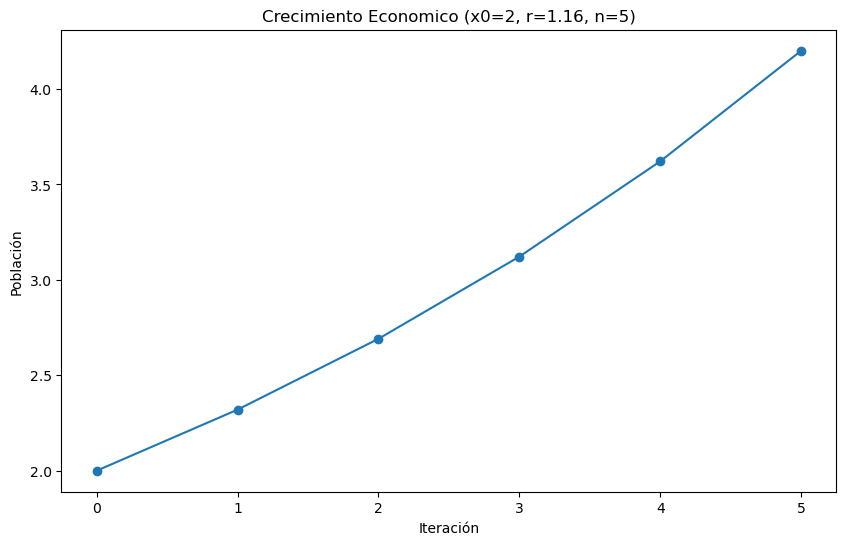

[2.0, 2.32, 2.6912, 3.1217919999999992, 3.621278719999999, 4.200683315199998]


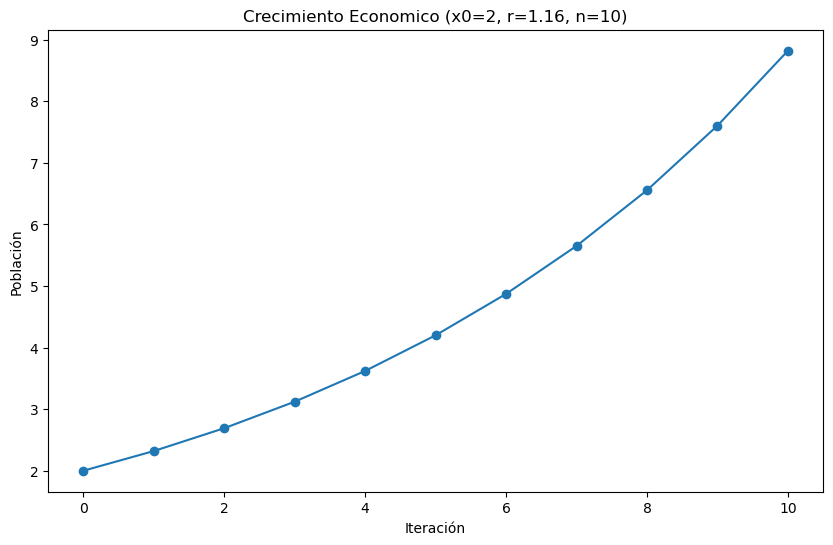

[2.0, 2.32, 2.6912, 3.1217919999999992, 3.621278719999999, 4.200683315199998, 4.872792645631998, 5.652439468933117, 6.5568297839624154, 7.605922549396402, 8.822870157299825]


In [80]:

x0 = 2
r = 1.16
n = 5 # Tras 5 iteraciones se duplica

graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))

x0 = 2
r = 1.16
n = 10 # Tras 5 iteraciones se cuadriplica
graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))

# En este ejercicio se tiene una tasa de crecimiento de alpa=0,16 y se calculo
# matemáticamente que en un periodo n=5 y n=10 se duplica y cuadriplica respectivamente,
# dicho resultado se puede ver que es correcto grafiacamente y en el cálculo de la función.

## Ejercicio 3 (Eliminación Farmaco Sangre) ## 

En el ejericio se tiene una vida media de 2 semanas, veamos que calculando la constante r=13/14 y tomando un valor inicial de 4.225, se espera que en 5 días la concentración del fármaco en sangre sea de 3 mg/cm³ y en la gráfica se puede ver que es correcto. 


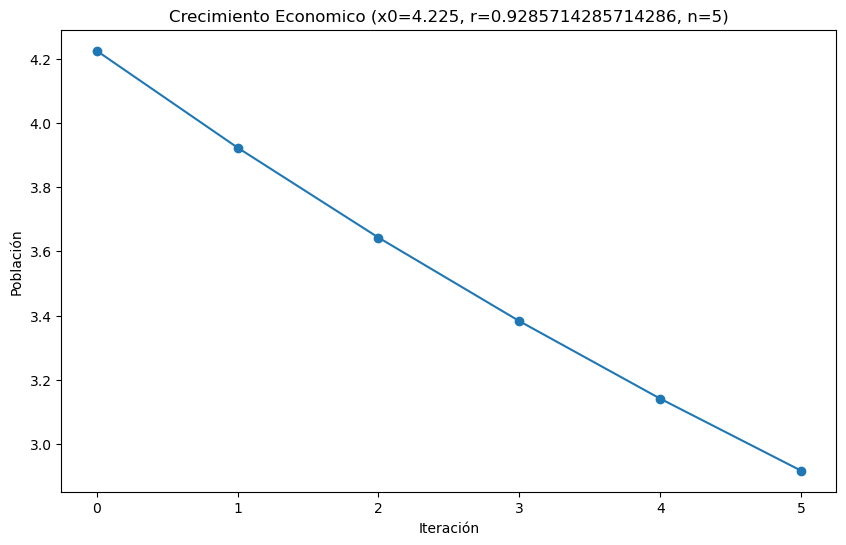

[4.225, 3.9232142857142853, 3.6429846938775508, 3.382771501457726, 3.141144965639317, 2.9167774680936516]


In [81]:
x0 = 4.225
r = 13/14
n = 5 # Tras 5 iteraciones se duplica

graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))


En este segundo apartado, se va a comprobar que el cálculo hecho en el ejercicio es correcto. Para ello comprobemos que el dato obtenido, es decir, el periodo n=51 es aquel el cual hace que la concentración del fármaco en sangre sea menor a 0,1 mg/cm³. En la gráfica se puede ver que es correcto, y en el cálculo de la función también.

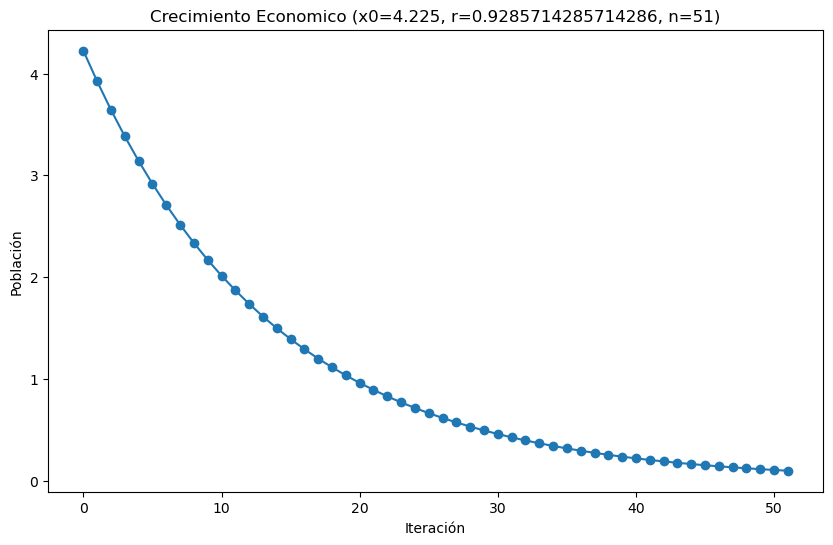


4.225 3.9232142857142853 3.6429846938775508 3.382771501457726 3.141144965639317 
2.9167774680936516 2.708436220372677 2.514976490346057 2.3353353124641956 2.168525647288182 
2.013630958196169 1.8698001754678713 1.7362430200773091 1.6122256615003585 1.4970666856789043 
1.390133350987554 1.2908381116313004 1.1986353893719217 1.113018575845356 1.033517248999259 
0.9596945883564549 0.8911449749024225 0.8274917624093924 0.7683852079515787 0.7135005502407515 
0.662536225223555 0.6152122091361583 0.571268479912147 0.5304635884898509 0.4925733321691472 
0.4573895227284938 0.4247188425336014 0.39438178235262994 0.3662116550417278 0.3400536796816044 
0.3157641311329184 0.29320955033770996 0.2722660110278735 0.2528184388115968 0.23475997889648278 
0.21799140897530547 0.20242059404849794 0.18796198018789095 0.17453612446018446 0.16206925842731412 
0.15049288282536313 0.13974339119498005 0.12976172039533862 0.12049302608138587 0.1118863813612869 
0.10389449697833783 0.09647346147988513 

In [82]:
x0 = 4.225
r = 13/14
n = 51 

graficar_modelo_malthus(x0, r, n)
# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")

  

## Ejercicio 4 (Desintegración Carbono-14) ## 

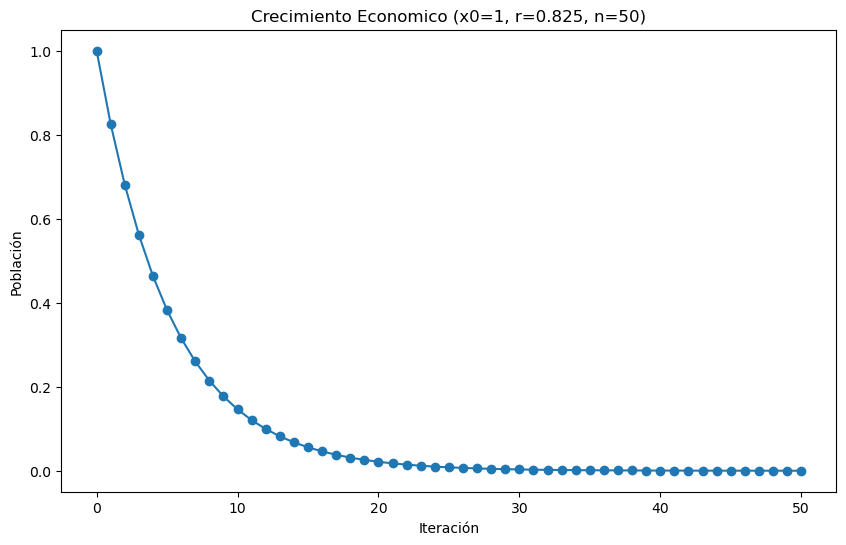


1.0 0.825 0.6806249999999999 0.561515625 0.4632503906249999 
0.3821815722656249 0.3152997971191405 0.26012233262329093 0.214600924414215 0.17704576264172736 
0.14606275417942507 0.12050177219802567 0.09941396206337118 0.08201651870228122 0.06766362792938199 
0.05582249304174015 0.04605355675943562 0.03799418432653438 0.031345202069390864 0.025859791707247462 
0.021334328158479153 0.0176008207307453 0.014520677102864874 0.01197955860986352 0.009883135853137402 
0.008153587078838356 0.006726709340041644 0.005549535205534356 0.004578366544565843 0.0037771523992668208 
0.003116150729395127 0.0025708243517509797 0.002120930090194558 0.0017497673244105103 0.001443558042638671 
0.0011909353851769036 0.0009825216927709453 0.0008105803965360298 0.0006687288271422246 0.0005517012823923352 
0.00045515355797367656 0.00037550168532828315 0.0003097888903958336 0.00025557583457656266 0.0002108500635256642 
0.00017395130240867296 0.00014350982448715517 0.00011839560520190302 9.767637429156998e-05 8.0

In [124]:
# Vida media 5780 años
x0 = 1
r = 0.825
n = 10

graficar_modelo_malthus(x0, r, n)
# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")

In [84]:
# Vida media 5780 años
x0 = 1000
r = 0.825
n = 1

# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")


1000.0 825.0 

## Ejercicio 5 (Hospital) ##

In [85]:
x0 = 20
# raiz septima de 2
r = 1/(2 ** (1/7))
n = 7

# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")


20.0 18.114473285278134 16.40670712015276 14.859942891369487 13.459001926323564 
12.190136542044758 11.040895136738127 10.000000000000002 

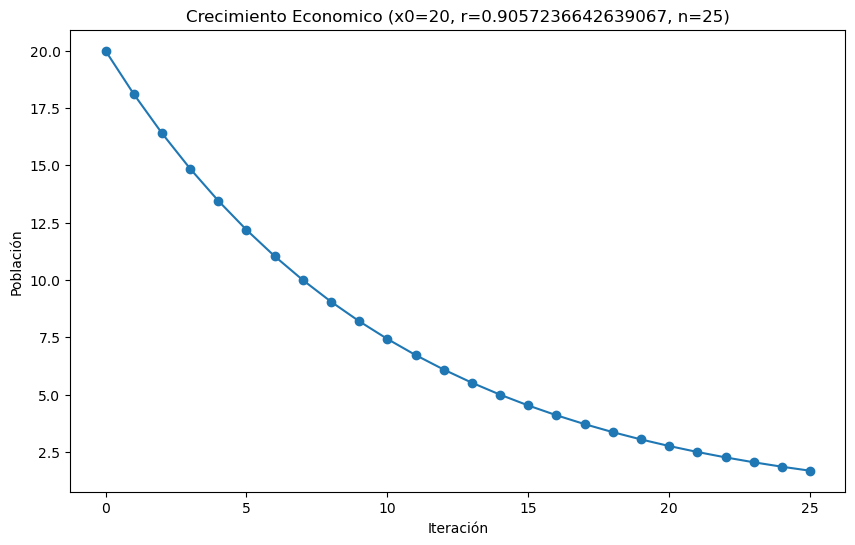


20.0 18.114473285278134 16.40670712015276 14.859942891369487 13.459001926323564 
12.190136542044758 11.040895136738127 10.000000000000002 9.05723664263907 8.203353560076383 
7.429971445684745 6.729500963161784 6.09506827102238 5.520447568369065 5.0000000000000036 
4.528618321319536 4.101676780038193 3.714985722842374 3.3647504815808933 3.0475341355111913 
2.760223784184533 2.500000000000002 2.264309160659769 2.050838390019097 1.8574928614211874 
1.682375240790447 

In [86]:
x0 = 20
# raiz septima de 2
r = 1/(2 ** (1/7))
n = 25

graficar_modelo_malthus(x0, r, n)

# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")

## Ejercicio 6 (Apicultora de la Alpujarra) ##

In [87]:
def modelar_dos_recurrencias(x0, x_mantener, y0, y_mantener, n):
    # Listas para almacenar los valores de x_n y y_n
    x_n = [x0]
    y_n = [y0]
    
    # Iteramos para calcular los valores siguientes
    for n in range(1, n + 1):
        # Calculamos los nuevos valores de x y y
        x_new = x_mantener * x_n[-1] + (1-y_mantener) * y_n[-1]
        y_new = (1-x_mantener) * x_n[-1] + y_mantener * y_n[-1]
        
        # Añadimos los nuevos valores a las listas
        x_n.append(x_new)
        y_n.append(y_new)
    
    # Devolvemos los resultados como tuplas de listas
    return x_n, y_n


[3400, 3850.0, 3962.5, 3990.625, 3997.65625]
[3999.4140625, 3999.853515625, 3999.96337890625, 3999.9908447265625, 3999.9977111816406]
[3999.99942779541, 3999.9998569488525, 3999.999964237213, 3999.9999910593033, 3999.999997764826]
[3999.9999994412065, 3999.9999998603016, 3999.9999999650754, 3999.999999991269, 3999.999999997817]
[3999.9999999994543, 3999.9999999998636, 3999.999999999966, 3999.999999999992, 3999.999999999998]
[4000.0, 4000.0000000000005, 4000.000000000001, 4000.000000000001, 4000.000000000001]
[4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001]
[4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001]
[4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001]
[4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001, 4000.000000000001]
[4000.000000000001]
[2600, 2150.0, 2037.5, 2009.375, 2002.34375]
[2000.5859375, 2000.146484375, 2000.0

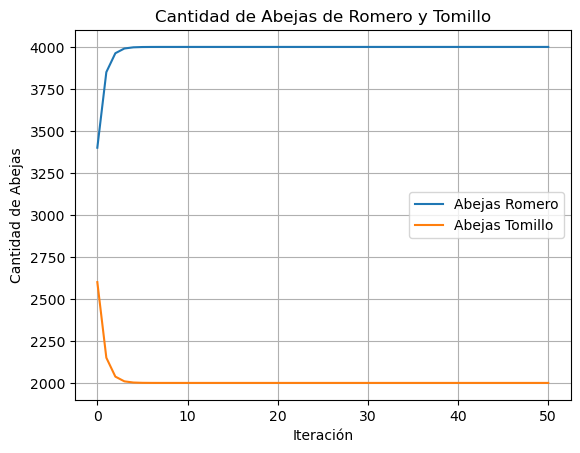

In [88]:
# Ejemplo de uso:
romero_inicial = 3400
tomillo_inicial = 2600
romero_mantener = 0.75
tomillo_mantener = 0.5
iteraciones = 50

romero_lista, tomillo_lista = modelar_dos_recurrencias(romero_inicial, romero_mantener, tomillo_inicial, tomillo_mantener, iteraciones)

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(romero_lista), 5):
    print(romero_lista[i:i+5])

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(tomillo_lista), 5):
    print(tomillo_lista[i:i+5])

graficar_vectores(range(iteraciones + 1), romero_lista, tomillo_lista, "Abejas Romero", "Abejas Tomillo", "Iteración", "Cantidad de Abejas", "Cantidad de Abejas de Romero y Tomillo")

## Ejercicio 7 (País A y B) ##

[0, 0.30000000000000004, 0.4800000000000001, 0.5880000000000001, 0.6528000000000002]
[0.6916800000000002, 0.7150080000000002, 0.7290048000000001, 0.7374028800000001, 0.7424417280000001]
[0.7454650368000001, 0.7472790220800001, 0.748367413248, 0.7490204479488001, 0.7494122687692801]
[0.7496473612615682, 0.749788416756941, 0.7498730500541646, 0.7499238300324989, 0.7499542980194994]
[0.7499725788116998, 0.74998354728702, 0.7499901283722121, 0.7499940770233273, 0.7499964462139965]
[0.749997867728398, 0.7499987206370389, 0.7499992323822234, 0.7499995394293342, 0.7499997236576006]
[0.7499998341945604, 0.7499999005167364, 0.7499999403100419, 0.7499999641860252, 0.7499999785116152]
[0.7499999871069691, 0.7499999922641816, 0.749999995358509, 0.7499999972151055, 0.7499999983290634]
[0.7499999989974382, 0.749999999398463, 0.7499999996390778, 0.7499999997834468, 0.7499999998700682]
[0.7499999999220409, 0.7499999999532245, 0.7499999999719347, 0.7499999999831608, 0.7499999999898965]
[0.7499999999939

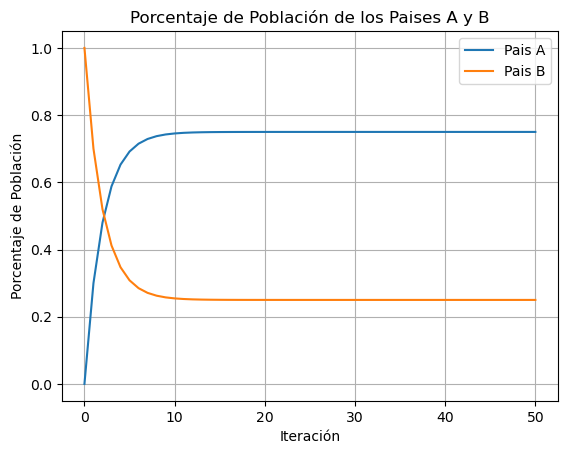

In [89]:
# Ejemplo de uso:
paisA_inicial = 0
paisB_inicial = 1
paisA_mantener = 0.9
paisB_mantener = 0.70
iteraciones = 50

paisA_lista, paisB_lista = modelar_dos_recurrencias(paisA_inicial, paisA_mantener, paisB_inicial, paisB_mantener, iteraciones)

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(paisA_lista), 5):
    print(paisA_lista[i:i+5])

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(paisB_lista), 5):
    print(paisB_lista[i:i+5])

graficar_vectores(range(iteraciones + 1), paisA_lista, paisB_lista, "Pais A", "Pais B", "Iteración", "Porcentaje de Población", "Porcentaje de Población de los Paises A y B")

## Ejercicio 8 (Compañia Paga+ y Paga-) ##

[0.75, 0.4375, 0.359375, 0.33984375, 0.3349609375]
[0.333740234375, 0.33343505859375, 0.3333587646484375, 0.3333396911621094, 0.33333492279052734]
[0.33333373069763184, 0.33333343267440796, 0.333333358168602, 0.3333333395421505, 0.3333333348855376]
[0.3333333337213844, 0.3333333334303461, 0.3333333333575865, 0.33333333333939663, 0.33333333333484916]
[0.3333333333337123, 0.3333333333334281, 0.333333333333357, 0.33333333333333925, 0.3333333333333348]
[0.3333333333333337, 0.3333333333333334, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337]
[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337]
[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337]
[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337]
[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337]
[0.3333333333333333

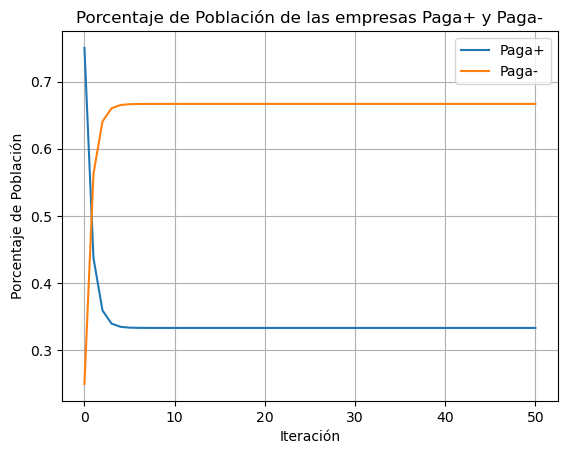

In [90]:
# En este caso da igual el valor pagamas_inicial y pagamenos_inicial que siempre convergerá la secuencia a los mismos valores finales, es decir
# pagamas_final=1/3 y pagamenos_final=2/3
# Ejemplo de uso:
pagamas_inicial = 0.75
pagamenos_inicial = 0.25
pagamas_mantener = 0.5
pagamenos_mantener = 0.75
iteraciones = 50

pagamas_lista, pagamenos_lista = modelar_dos_recurrencias(pagamas_inicial, pagamas_mantener, pagamenos_inicial, pagamenos_mantener, iteraciones)

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(pagamas_lista), 5):
    print(pagamas_lista[i:i+5])

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(pagamenos_lista), 5):
    print(pagamenos_lista[i:i+5])

graficar_vectores(range(iteraciones + 1), pagamas_lista, pagamenos_lista, "Paga+", "Paga-", "Iteración", "Porcentaje de Población", "Porcentaje de Población de las empresas Paga+ y Paga-")

## Ejercicio 9 (Partidas de ajedrez) ##


La jugadora de ajedrez usa dos estrategias, A y B. La estrategia A tiene una probabilidad de ganar del 80% y la estrategia B del 60%. La jugadora adapta su estrategia semanalmente basándose en las derrotas y empates obtenidos usando B la semana anterior, jugando tantas partidas con B la siguiente semana como derrotas y empates obtuvo.

### Análisis del problema

La jugadora ajusta el uso de las estrategias para diversificar su juego, lo que podría llevar a un ciclo retroalimentado que finalmente balancea el uso de ambas estrategias. Si en una semana usa mucho B y no tiene éxito, usará mucho B la semana siguiente, y así sucesivamente hasta que las ganancias con A compensen el total de partidas.

### Razonamiento Matemático

Si se denota $a_n$ al número de partidas jugadas con la estrategia A en la semana n y respectivamente $b_n$ al número de partidas con B en la semana n, tenemos que:
$$ b_{n+1} = 0,2a_n+0,4b_n $$

### Simulación de Partidas

Vamos a simular el número de partidas jugadas con B durante 50 semanas para ilustrar este equilibrio.



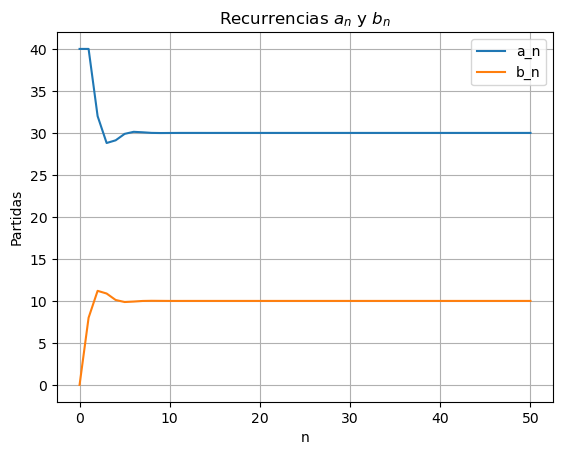

[40, 40, 32.0, 28.8, 29.12]
[29.887999999999998, 30.1312, 30.07488, 30.003712, 29.9865088]
[29.99386112, 30.000242688, 30.0013248512, 30.00048140288, 29.999927590912]
[29.9998747557888, 29.99996438413312, 30.00001080249549, 30.00001144417157, 30.00000241716953]
[29.9999986780335, 29.99999898777949, 29.999999859505095, 30.00000014624614, 30.00000008659744]
[30.000000005389744, 29.99999998483641, 29.999999992856615, 30.000000000175362, 30.000000001498822]
[30.000000000564455, 29.99999999992602, 29.999999999857515, 29.9999999999578, 30.000000000011617]
[30.000000000013088, 30.000000000002913, 29.999999999998547, 29.999999999998835, 29.999999999999822]
[30.000000000000163, 30.0000000000001, 30.000000000000007, 29.999999999999982, 29.999999999999993]
[30.0, 30.0, 30.0, 30.0, 30.0]
[30.0]
[0, 8.0, 11.2, 10.879999999999999, 10.112]
[9.8688, 9.92512, 9.996288, 10.0134912, 10.006138880000002]
[9.999757312, 9.9986751488, 9.999518597120002, 10.000072409088, 10.000125244211201]
[10.000035615866881

In [91]:
import matplotlib.pyplot as plt
import numpy as np


def recurrencias(a_values, b_values, n):

    # Condición inicial, asumiendo algún valor inicial para b_0
    b0 = 0  # Puedes cambiar esto según sea necesario
    b_values.append(b0)
    a_values.append(40 - b0)

    # Iterar para calcular los valores de a_n y b_n hasta n
    for i in range(n):
        b_nmas1 = 0.2 * a_values[i] + 0.4 * b_values[i]
        b_values.append(b_nmas1)

        a_n = 40 - b_values[i]
        a_values.append(a_n)

# Listas para almacenar los valores de a_n y b_n
a_values = []
b_values = []
n=50

# Llamar a la función con el valor deseado de n
recurrencias(a_values, b_values, n)
graficar_vectores(range(n+1), a_values, b_values, 'a_n', 'b_n', 'n', 'Partidas', 'Recurrencias $a_n$ y $b_n$')

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(a_values), 5):
    print(a_values[i:i+5])

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(b_values), 5):
    print(b_values[i:i+5])

## Ejercicio 10: Modelo de explotación maderera

### a) Ley de Recurrencia del Modelo

Una compañía maderera gestiona un bosque talando el 10% de los árboles cada año y replantando un número fijo de árboles, denotado como $ K $. El modelo del tamaño del bosque en el año $ n $, $ p_n $, se puede expresar mediante la siguiente ley de recurrencia:

$$
p_{n+1} = 0.9 \cdot p_n + K
$$

donde $ 0.9 \cdot p_n $ representa el 90% del bosque que queda después de la tala.

### b) Solución del modelo con condiciones iniciales

Dado un tamaño inicial del bosque de 10,000 árboles, calculamos la evolución del tamaño del bosque para los próximos años, obteniendo por tanto la siguiente solución para la ecuación del modelo
$$p_n=(p_0-10K)0,9^n +10K$$

### c) Cálculo del precio mínimo de venta por árbol

Para que la explotación sea rentable a largo plazo, el precio de venta por árbol talado debe al menos cubrir el costo de replantación. Considerando que plantar un árbol cuesta 1 euro, el precio mínimo de venta de cada árbol debe ser este costo, ajustado por cualquier otro factor económico relevante.


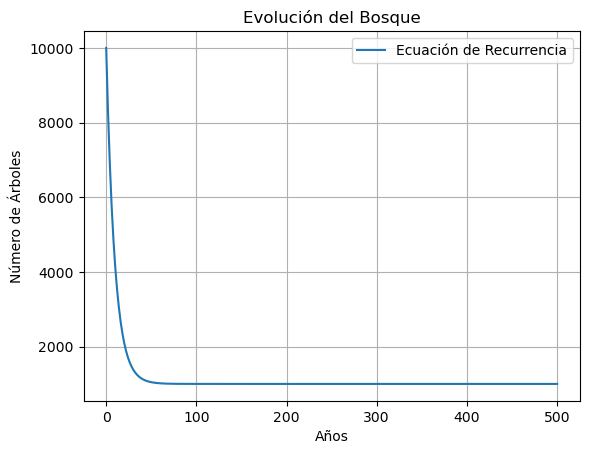

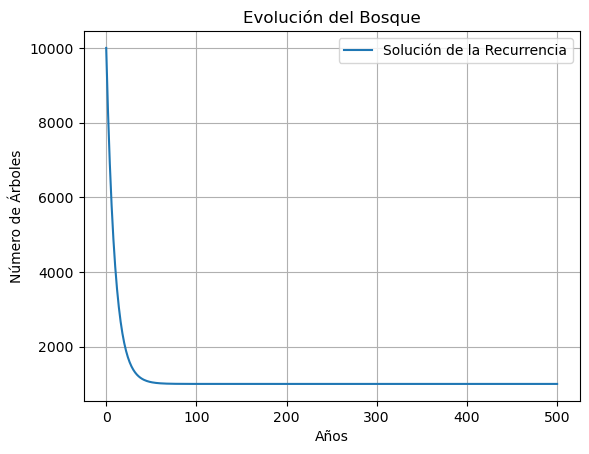

[10000, 9100.0, 8290.0, 7561.0, 6904.900000000001]
[6314.410000000001, 5782.969000000001, 5304.672100000001, 4874.204890000001, 4486.784401000001]
[4138.1059609, 3824.2953648100006, 3541.8658283290006, 3287.6792454961005, 3058.9113209464904]
[2853.0201888518413, 2667.718169966657, 2500.9463529699915, 2350.8517176729924, 2215.7665459056934]
[2094.1898913151244, 1984.770902183612, 1886.2938119652508, 1797.6644307687259, 1717.8979876918534]
[1646.108188922668, 1581.4973700304013, 1523.347633027361, 1471.012869724625, 1423.9115827521625]
[1381.5204244769463, 1343.3683820292517, 1309.0315438263267, 1278.128389443694, 1250.3155504993247]
[1225.2839954493923, 1202.755595904453, 1182.4800363140077, 1164.232032682607, 1147.8088294143463]
[1133.0279464729117, 1119.7251518256205, 1107.7526366430584, 1096.9773729787526, 1087.2796356808772]
[1078.5516721127894, 1070.6965049015105, 1063.6268544113595, 1057.2641689702236, 1051.5377520732013]
[1046.3839768658813, 1041.7455791792931, 1037.571021261364,

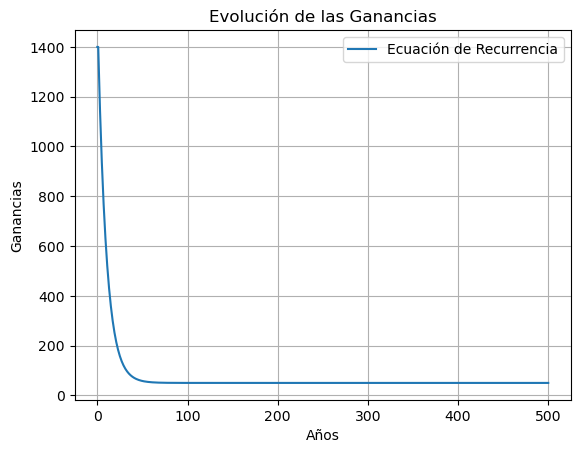

[1400.0000000000002, 1400.0000000000002, 1265.0000000000002, 1143.5000000000002, 1034.1500000000003]
[935.7350000000001, 847.1615000000003, 767.4453500000002, 695.7008150000003, 631.1307335000002]
[573.0176601500002, 520.7158941350001, 473.64430472150013, 431.2798742493502, 393.15188682441516]
[358.83669814197367, 327.9530283277763, 300.1577254949986, 275.1419529454989, 252.62775765094898]
[232.36498188585404, 214.12848369726873, 197.7156353275418, 182.94407179478765, 169.6496646153089]
[157.68469815377796, 146.9162283384002, 137.22460550456015, 128.50214495410415, 120.65193045869376]
[113.58673741282439, 107.22806367154195, 101.50525730438775, 96.35473157394901, 91.71925841655408]
[87.54733257489869, 83.79259931740884, 80.41333938566794, 77.37200544710115, 74.63480490239104]
[72.17132441215193, 69.95419197093673, 67.95877277384307, 66.16289549645879, 64.54660594681292]
[63.0919453521316, 61.78275081691845, 60.6044757352266, 59.54402816170395, 58.58962534553356]
[57.73066281098019, 56.

In [123]:
import matplotlib.pyplot as plt

# Simular la evolución del bosque durante los años especificados mediante
# la ecuación de recurrencia p_n = 0.9 * p_{n-1} + K
def bosque_recurrencia(p_0, K, years, bosque):
    # Lista para almacenar el tamaño del bosque cada año
    bosque.append(p_0)

    # Iterar para calcular el tamaño del bosque en cada año
    for n in range(1, years + 1):
        p_next = 0.9 * bosque[n-1] + K
        bosque.append(p_next)

    return bosque

# Simular la evolución del bosque durante los años especificados mediante
# la solución de la ecuación de recurrencia p_n=(p_0-K/0.1)*0.9^n+K/0.1
def bosque_solucion(p_0, K, years, bosque):
    # Lista para almacenar el tamaño del bosque cada año
    bosque.append(p_0)

    # Iterar para calcular el tamaño del bosque en cada año
    for n in range(1, years + 1):
        p_next = (p_0 - K/0.1) * 0.9**n + K/0.1
        bosque.append(p_next)

    return bosque

# El objetivo será ver que las soluciones obtenidas con ambas 
# formulaciones son iguales (la ecuación de recurrencia y la solución de la ecuación de recurrencia)


# Parámetros iniciales
p_0 = 10000  # Tamaño inicial del bosque
K = 100     # Número fijo de árboles plantados cada año
years = 500  # Número de años a simular

# Lista para almacenar el tamaño del bosque cada año con los dos métodos
arboles_rec= []
arboles_sol = []

# Simular la evolución del bosque mediante la ecuación de recurrencia
bosque_recurrencia(p_0, K, years, arboles_rec)
bosque_solucion(p_0, K, years, arboles_sol)


# Graficar la evolución del tamaño del bosque
graficar(range(years+1), arboles_rec, 'Ecuación de Recurrencia', 'Años', 'Número de Árboles', 'Evolución del Bosque')
graficar(range(years+1), arboles_sol, 'Solución de la Recurrencia', 'Años', 'Número de Árboles', 'Evolución del Bosque')

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(arboles_rec), 5):
    print(arboles_rec[i:i+5])

# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(arboles_sol), 5):
    print(arboles_sol[i:i+5])

# En la muestra de los resultados (numeros de arboles) se puede ver que los valores son iguales
# y que el número de arboles a largo plazo tiende a 10K

# Dada la ecuación de recurrencia de las ganancias v_n en el periodo n,
# v_{n+1}=0,1*v*p_n-K, veamos que a largo plazo converge a K(v-1)

v=1.5

def ganancias_recurrencia(v, p_0, K, years, ganancias, arboles):
    # Lista para almacenar las ganancias cada año
    ganancias.append(0.1 * v * p_0 - K)

    # Iterar para calcular las ganancias en cada año
    for n in range(1, years + 1):
        ganancia_next = 0.1 * v * arboles[n-1] - K
        ganancias.append(ganancia_next)

    return ganancias

ganancias= []
ganancias_recurrencia(v, p_0, K, years, ganancias, arboles_sol)

graficar(range(years+1), ganancias, 'Ecuación de Recurrencia', 'Años', 'Ganancias', 'Evolución de las Ganancias')
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(ganancias), 5):
    print(ganancias[i:i+5])

# Se puede observar en la muetra de los valores que efectivamente tiende a K(v-1) a largo plazo

Podemos observar que las soluciones gráficas tanto de la ecuación de recurrencia como de la solución de la ecuación de recurrencia son iguales, por lo que el cálculo para obtener la solución está bien realizado.

## Ejercicio 11: Dinámica de precios según el modelo de la telaraña

### a) Ecuación en diferencias y precio de equilibrio

El modelo de la telaraña analiza la evolución de precios en un mercado donde las decisiones sobre la oferta se basan en precios pasados. Las funciones de oferta $O(p)$ y demanda $D(p)$ para este ejercicio están definidas como:

- Oferta: $O(p) = 1 + p$
- Demanda: $D(p) = 2 - 2p$

El equilibrio se alcanza cuando $O(p) = D(p)$, lo cual nos da:

$$
1 + p = 2 - 2p
$$
$$
3p = 1
$$
$$
p^* = \frac{1}{3}
$$

La ecuación en diferencias que describe la dinámica del precio es más compleja, considerando que el precio en el periodo $n+1$ depende del equilibrio establecido por la oferta basada en el precio del periodo $n$:

$$
p_{n+1} = D^{-1}(O(p_n)) = \frac{2 - (1 + p_n)}{2} = 0.5 - 0.5 \cdot p_n
$$

### b) Tendencia del precio del producto a largo plazo

Dado que la relación de precios es $p_{n+1} = 0.5 - 0.5 \cdot p_n$, este modelo sugiere una convergencia al precio de equilibrio de $p^* = \frac{1}{3}$ a medida que $n$ tiende a infinito, ya que el factor multiplicativo $|0.5|$ es menor que 1.

### c) Análisis gráfico de la evolución de los precios

Utilizaremos una simulación para visualizar cómo evolucionan los precios en este modelo a lo largo de varios periodos, esperando ver cómo convergen al precio de equilibrio.


In [93]:

import matplotlib.pyplot as plt

def oferta(p):
    return 1 + p

def demanda(p):
    return 2 - 2 * p

a = 2.0
b = 2.0
c = 1.0
d = 1.0

# Parámetros iniciales
precio_inicial = 1 # Un precio inicial para ver la convergencia
periodos = 20  # Número de periodos a simular



prices = cobWeb(a,b,c,d, precio_inicial, periodos, plot=False)


Si gráficamos pues el modelo de la telaraña, podemos ver cómo los precios convergen al precio de equilibrio de 1/3.

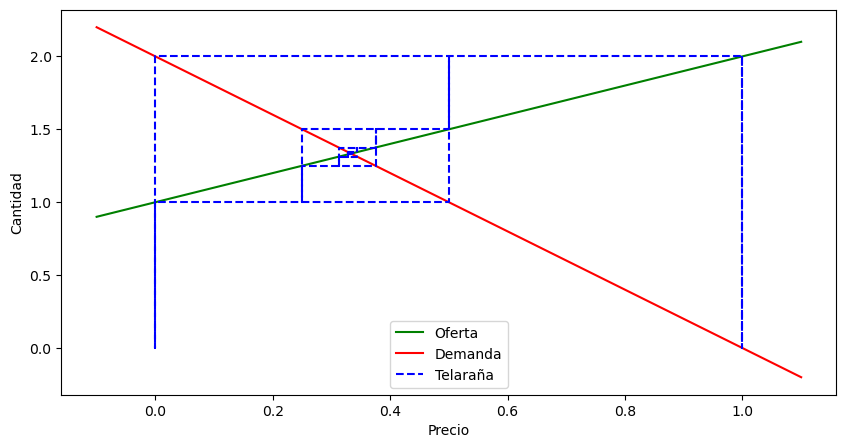

In [94]:
graph_cobWeb(prices, demanda, oferta)

Curiosamente, podemos gráficar solo los precios y ver cómo convergen al precio de equilibrio.

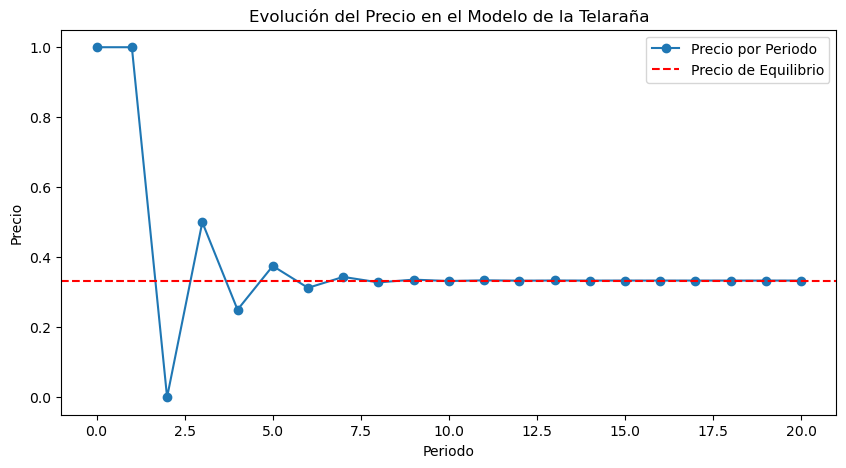

In [95]:
null = cobWeb(a,b,c,d, precio_inicial, periodos, plot=True) #Ponemos null = simplemente para que no se muestre el resultado de la función, solo la gráfica

## Ejercicio 12: Dinámica de precios según el modelo de la telaraña V2
Resuelve el Ejercicio 11 para el caso en que las funciones de oferta y demanda vienen dadas por:

O(p) = 1 + p, D(p) = 2 − 0,5 p


#### Simplemente:
Basta con usar las mismas funciones que antes con estos nuevos parámetros:

In [96]:
import matplotlib.pyplot as plt

def oferta(p):
    return 1 + p

def demanda(p):
    return 2 - 0.5 * p

a = 2.0
b = 0.5
c = 1.0
d = 1.0

# Parámetros iniciales
precio_inicial = 1 # Un precio inicial para ver la divergencia
periodos = 20  # Número de periodos a simular

precio_equilibrio = find_equilibrium(demanda, oferta)
print (f'El precio de equilibrio es: {precio_equilibrio}')


El precio de equilibrio es: 0.6600000000000004


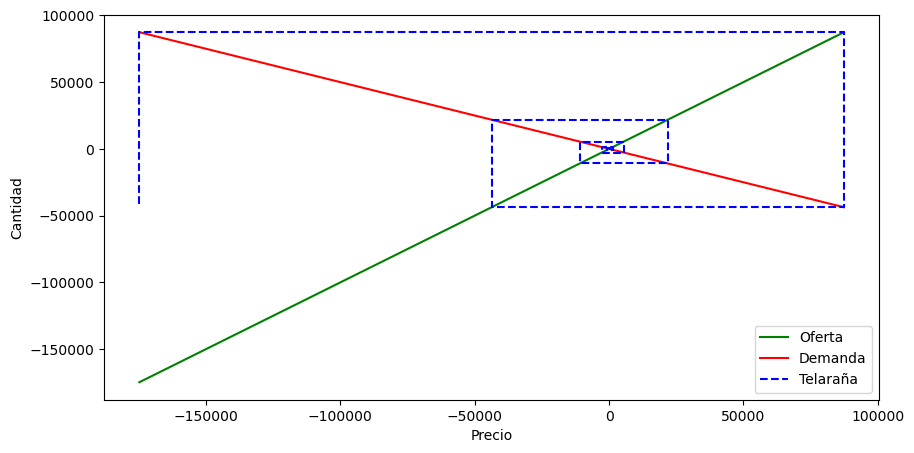

In [97]:
prices = cobWeb(a,b,c,d, precio_inicial, periodos, plot=False)

graph_cobWeb(prices, demanda, oferta)

Como podemos observar, en este caso los precios divergen. Podemos verlo graficando solo los precios:

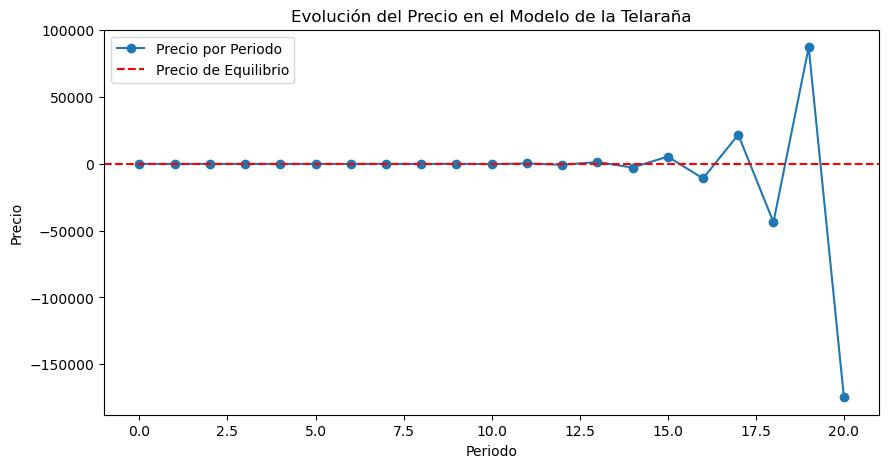

In [98]:
null = cobWeb(a,b,c,d, precio_inicial, periodos, plot=True) #Ponemos null = simplemente para que no se muestre el resultado de la función, solo la gráfica

## Ejercicio 13. Modelo de la telaraña V3
Resuelve el ejercicio 11 para el caso en el que las funciones de oferta y demanda vienen dadas por:

O(p) = 1 + p, D(p) = 2 − p.

In [99]:
def oferta(p):
    return 1 + p

def demanda(p):
    return 2 -  p

a = 2.0
b = 1.0
c = 1.0
d = 1.0

# Parámetros iniciales
precio_inicial = 1 # Un precio inicial para ver la convergencia
periodos = 20  # Número de periodos a simular

# Precio de equilibrio
precio_equilibrio = find_equilibrium(demanda, oferta)
print(f'El precio de equilibrio es: {precio_equilibrio}')

El precio de equilibrio es: 0.5000000000000002


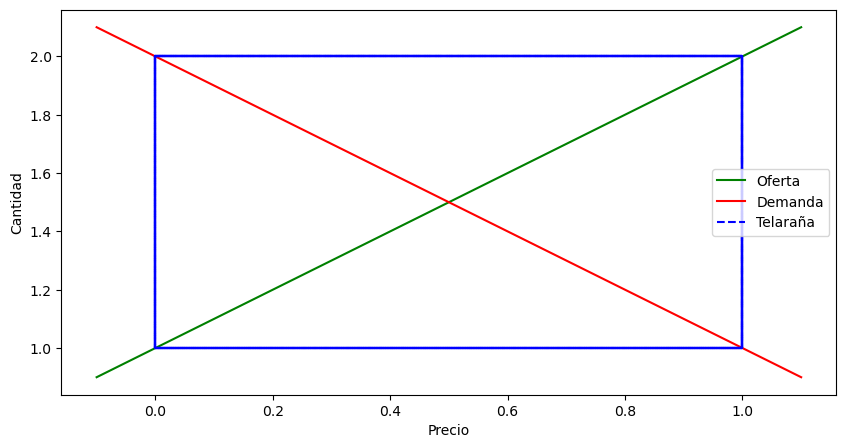

In [100]:
prices = cobWeb(a,b,c,d, precio_inicial, periodos, plot=False)
graph_cobWeb(prices, demanda, oferta)

Como vemos, en este caso los precios son constantes en un 2-ciclo. Podemos verlo graficandolos solos

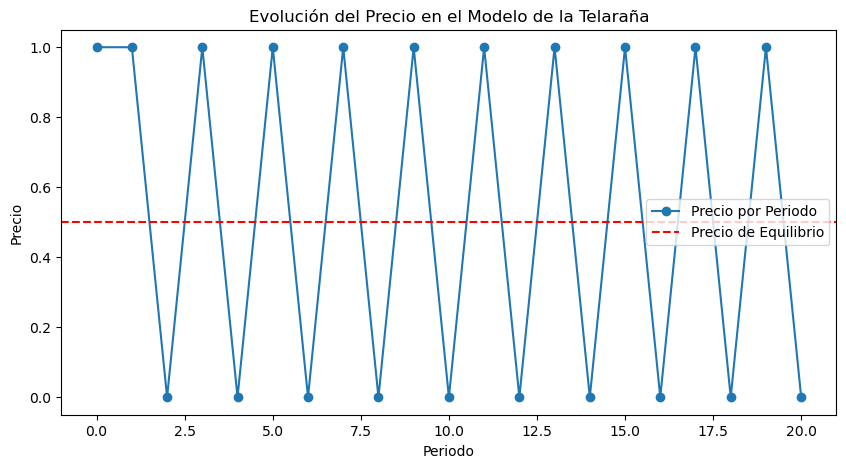

In [101]:
null = cobWeb(a,b,c,d, precio_inicial, periodos, plot=True) #Ponemos null = simplemente para que no se muestre el resultado de la función, solo la gráfica

Si usamos un precio inicial igual al precio de equilibrio, debería ser constante

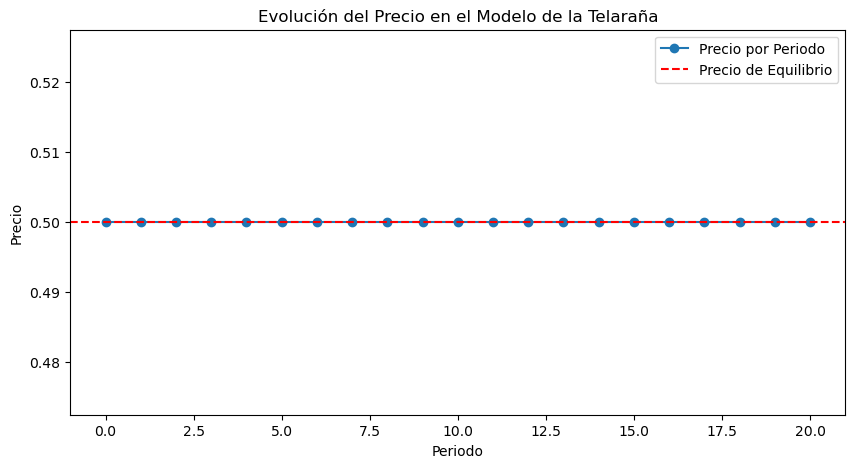

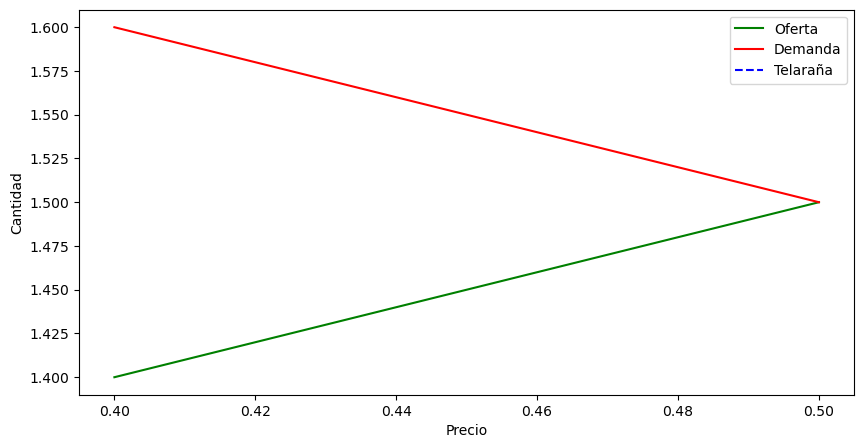

In [102]:
precio_inicial = 0.5
prices = cobWeb(a,b,c,d, precio_inicial, periodos, plot=True)
graph_cobWeb(prices, demanda, oferta)

## Ejercicio 14: Modelo de von Bertalanffy
El modelo de von Bertalanffy se emplea para describir la longitud de ciertos seres vivos o de partes de ellos. En su
versión discreta se puede formular como una ecuación lineal de orden 1:

$$L_{n+1} = a+  bL_n \ ,$$

donde $L_n$ representa la longitud esperada en el periodo $n$, $a > 0$ es una constante relativa a la capacidad de absorción celular y $0 <  b < 1$ es una constante relacionada con la degradación celular.


In [103]:
#Apartado a)
Ln = lambda n: 3.8*(1-(0.9)**n)

tabla = []
for i in range(1,6):
    tabla.append([i, Ln(i)])

print("Año\tLn")
      
for fila in tabla:
    print("{}\t{:5f}".format(fila[0], fila[1]))

print("\n")

Año	Ln
1	0.380000
2	0.722000
3	1.029800
4	1.306820
5	1.556138




Respecto al comportamiento asintótico de $L_n$, es fácil ver que:
$$$\lim_{n \rightarrow \infty} L_n = \lim_{n \rightarrow \infty} 3.8(1-(0.9)^n) = 3.8$$

Para verlo más claro, vamos a graficarlo:

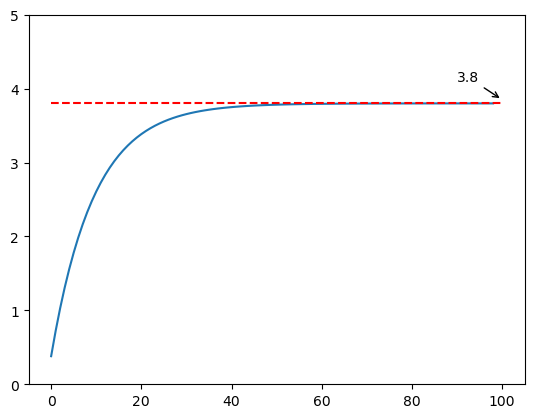

In [104]:
secuencia = []
for i in range(1,100):
    secuencia.append(Ln(i))

plt.plot(secuencia)
plt.hlines(y=3.8, xmin=0, xmax=100, colors="red", linestyles="dashed")
plt.ylim(0,5)
plt.annotate('3.8', xy=(100, 3.85), xytext=(90, 3.8 + 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

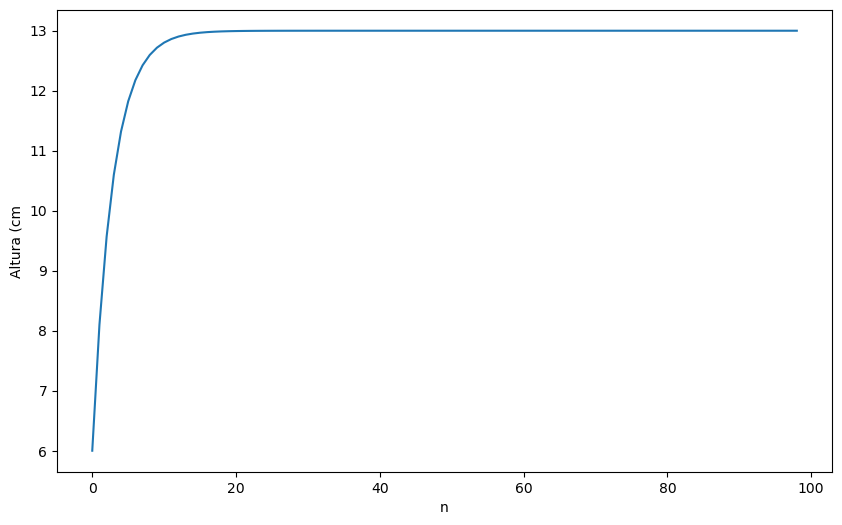

In [105]:
#Apartado b)
# Este modelo, en su forma discreta, es un caso particular del modelo logístico. Vamos a graficarla:

secuencia = []
for i in range(1,100):
    secuencia.append(modelo_logistico(0.7, 3.9, 3, i))

graficar(secuencia, "n", "Altura (cm")

Observando la gráfica vemos que el tamaño de las hojas de esta especie de árbol puede alcanzar hasta 13cm.

# Tema 3 #

In [106]:
def graficar_samuelson(alpha, beta, G, y0, y1, n):
    """
    Genera una secuencia modelada por la ecuación recursiva:
    y_{n+2} = alpha(1-beta)y_{n+1} - beta*alpha*y_n + G

    Parámetros:
    alpha (float): Parámetro alpha de la ecuación.
    beta (float): Parámetro beta de la ecuación.
    G (float): Término constante en la ecuación.
    y0 (float): Condición inicial para y_0.
    y1 (float): Condición inicial para y_1.
    n (int): Número de términos de la secuencia a generar.

    Devuelve:
    list: Lista conteniendo los n primeros términos de la secuencia.
    """
    # Lista para almacenar la secuencia, inicializada con los dos primeros términos
    y = [y0, y1]
    
    # Generar la secuencia hasta n términos
    for i in range(2, n):
        # Aplicar la ecuación de recurrencia para calcular y_n+2
        yn2 = alpha * (1 + beta) * y[i-1] - beta * alpha * y[i-2] + G
        # Agregar el nuevo término a la lista
        y.append(yn2)

    plt.plot(range(len(y)), y, color='blue')
    plt.xlabel('Índice')
    plt.ylabel('Valor de la secuencia')
    plt.title('Secuencia generada por el modelo')
    plt.show()

## Modelo de Samuelson ##

In [107]:
def modelo_samuelson(alpha, beta, G, y0, y1, n):
    """
    Genera una secuencia modelada por la ecuación recursiva:
    y_{n+2} = alpha(1-beta)y_{n+1} - beta*alpha*y_n + G

    Parámetros:
    alpha (float): Parámetro alpha de la ecuación.
    beta (float): Parámetro beta de la ecuación.
    G (float): Término constante en la ecuación.
    y0 (float): Condición inicial para y_0.
    y1 (float): Condición inicial para y_1.
    n (int): Número de términos de la secuencia a generar.

    Devuelve:
    list: Lista conteniendo los n primeros términos de la secuencia.
    """
    # Lista para almacenar la secuencia, inicializada con los dos primeros términos
    y = [y0, y1]
    
    # Generar la secuencia hasta n términos
    for i in range(2, n):
        # Aplicar la ecuación de recurrencia para calcular y_n+2
        yn2 = alpha * (1 + beta) * y[i-1] - beta * alpha * y[i-2] + G
        # Agregar el nuevo término a la lista
        y.append(yn2)
    
    return y

[500, 6000, 7127.0, 4410.75, 170.1875]
[-3093.328125, -3992.30078125, -2668.3798828125, -339.249267578125, 1579.2233276367188]
[2230.466110229492, 1605.6651420593262, 336.2318449020386, -781.9590504169464, -1227.622696697712]
[-946.0590830594301, -259.8568313010037, 386.723273168318, 680.2967149361502, 562.3284387939493]
[194.68801229032397, -176.38631373255703, -364.49890138343926, -321.3338914298813, -126.29318824977219]
[85.13393326019576, 203.13730776257384, 192.0711847580705, 89.73600012565777, -29.883388411480652]
[-102.65623560859414, -103.9077532021322, -50.89251479621964, 16.315171406324595, 60.563350355070476]
[65.46780938909464, 38.41224897006545, 0.9144541707608269, -25.66611901409805, -30.768489395693187]
[-17.21102248404295, 3.5625889417162, 19.36150304017746, 23.529937093934677, 16.891294087285253]
[5.466664788655557, -3.835139579644494, -6.893923066047286, -3.741049147825737, 2.494130864753293]
[7.923450441810919, 10.03371490369868, 8.599555798265161, 5.22415857005744, 

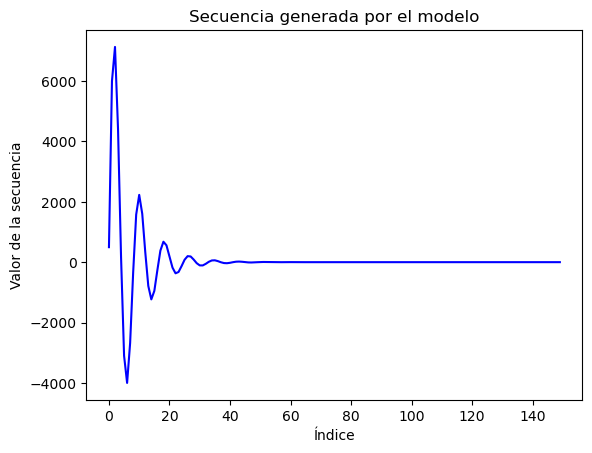

In [108]:
# Ejemplo de uso de la función con 0<alpha<1 y beta<1/alpha
alpha = 0.5
beta = 1.5
G = 2
y0 = 500
y1 = 6000
n = 150

secuencia = modelo_samuelson(alpha, beta, G, y0, y1, n)
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(secuencia), 5):
    print(secuencia[i:i+5])

# Podemos ver que con los valores dados, la secuencia converge a un valor constante, el punto de equilibrio, Ye=G/(1-alpha)

graficar_samuelson(alpha, beta, G, y0, y1, n)

[500, 6000, 21377.0, 66665.75, 201900.3125]
[607130.234375, 1822464.67578125, 5468201.5068359375, 16405212.130126953, 49216094.097595215]
[147648627.5731964, 442946143.6798973, 1328838628.759923, 3986516036.5699425, 11959548224.427456]
[35878644761.32059, 107635934351.99043, 322907803108.9928, 968723409368.7444, 2906170228139.5576]
[8718510684445.667, 26155532053359.246, 78466596160096.42, 235399788480305.25, 706199365440929.8]
[2118598096322801.8, 6355794288968417.0, 1.9067382866905264e+16, 5.72021486007158e+16, 1.716064458021474e+17]
[5.148193374064422e+17, 1.5444580122193265e+18, 4.633374036657979e+18, 1.3900122109973938e+19, 4.1700366329921815e+19]
[1.2510109898976544e+20, 3.753032969692963e+20, 1.1259098909078888e+21, 3.3777296727236663e+21, 1.0133189018171e+22]
[3.0399567054513e+22, 9.1198701163539e+22, 2.73596103490617e+23, 8.20788310471851e+23, 2.462364931415553e+24]
[7.387094794246659e+24, 2.216128438273998e+25, 6.648385314821994e+25, 1.994515594446598e+26, 5.983546783339794e+

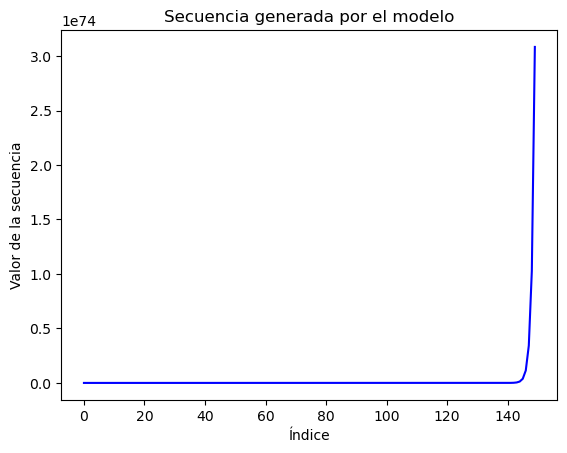

In [109]:
# Ejemplo de uso de la función con alpha, beta>=1
alpha = 1.5
beta = 1.5
G = 2
y0 = 500
y1 = 6000
n = 150

secuencia = modelo_samuelson(alpha, beta, G, y0, y1, n)
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(secuencia), 5):
    print(secuencia[i:i+5])

# Podemos ver que con los valores dados, la secuencia no converge

graficar_samuelson(alpha, beta, G, y0, y1, n)

[500, 6000, 9877.0, 9786.75, 4782.5625]
[-3861.953125, -12734.62109375, -17456.1455078125, -14627.978271484375, -3776.7800903320312]
[11677.607681274414, 25158.788555145264, 29432.870369911194, 20061.03745341301, -1682.2724189162254]
[-28018.273549869657, -46927.13818862662, -47097.64989275951, -23759.96457654587, 17294.124356994114]
[59966.67334542204, 83326.02290824593, 70864.19840765283, 19856.818578085047, -53828.81549791721]
[-119019.45034396142, -140996.01872953598, -97966.7198467362, 4805.263680131611, 130869.61124865056]
[223017.24008497395, 226695.15608789123, 117946.97304759221, -76959.74227657769, -282111.2652935012]
[-397493.03641790495, -342971.7321144572, -103332.23567791888, 247885.2527067134, 562966.486834147]
[675336.7860763655, 478133.267090956, -7435.765186283854, -610677.1729396917, -1059388.3461616056]
[-1090581.139608195, -584279.5616123343, 340739.19168865867, 1326645.0374705705, 1895706.8259626753]
[1659182.6485964684, 533938.1025904752, -1139584.6312122538, -26

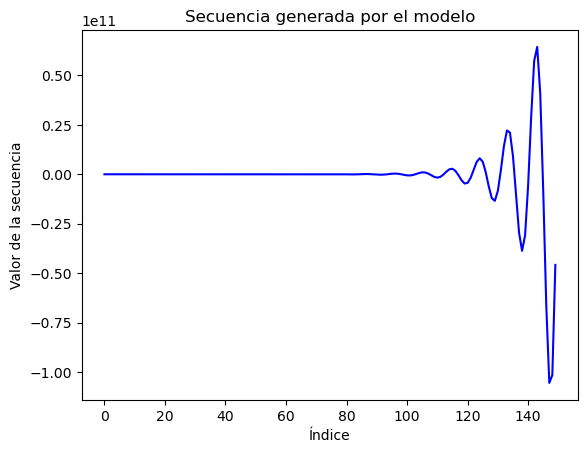

In [110]:
# Ejemplo de uso de la función con 0<alpha<1 y beta>1/alpha
alpha = 0.5
beta = 2.5
G = 2
y0 = 500
y1 = 6000
n = 150

secuencia = modelo_samuelson(alpha, beta, G, y0, y1, n)
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(secuencia), 5):
    print(secuencia[i:i+5])

# Podemos ver que con los valores dados, la secuencia no converge

graficar_samuelson(alpha, beta, G, y0, y1, n)